### Отражение нескольких легенд

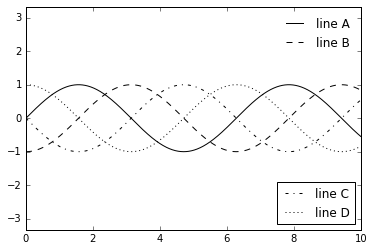

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color = 'black')
ax.axis('equal')

# задаем линии и метки первой легенды
ax.legend(lines[:2], ['line A', 'line B'],
         loc = 'upper right', frameon = False)

# создаем вторую легенду и добавляем рисователь вручную

from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
            loc = 4, frameon=True) # 'lower right' то же самое что 4 (см ax.legend??)
ax.add_artist(leg); #add_artist используем, чтобы добавить вторую легенду, иначе одна будет перекрывать другую

## Пользовательские настройки шкал цветов

In [2]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

In [3]:
I

array([[ 0.        ,  0.01000984,  0.02001868, ..., -0.52711499,
        -0.53559488, -0.54402111],
       [ 0.        ,  0.01000934,  0.02001768, ..., -0.52708858,
        -0.53556805, -0.54399386],
       [ 0.        ,  0.01000784,  0.02001467, ..., -0.52700936,
        -0.53548755, -0.54391209],
       ...,
       [-0.        , -0.0085063 , -0.01701176, ...,  0.44793914,
         0.4551453 ,  0.46230586],
       [-0.        , -0.00845306, -0.01690528, ...,  0.44513546,
         0.45229652,  0.45941226],
       [-0.        , -0.00839897, -0.01679711, ...,  0.44228718,
         0.44940242,  0.45647263]])

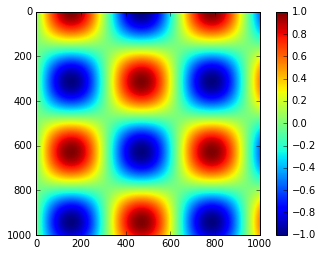

In [4]:
plt.imshow(I)
plt.colorbar();

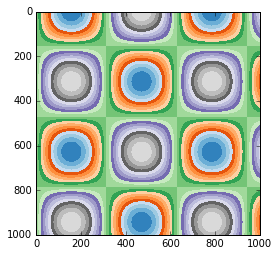

In [5]:
# карту цветов можно задать аргументом cmap
plt.imshow(I, cmap='tab20c_r');

In [6]:
plt.cm.#TAB - перечислены цветовые карты

SyntaxError: invalid syntax (<ipython-input-6-1f9bd8eb0cea>, line 1)

### Выбор карты цветов

In [7]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Возвращает версию в оттенках серого заданной карты цветов"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # Преобразуем RGBA в воспринимаемую глазом светимость серого цвета
    # http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

In [8]:
def view_colormap(cmap):
    """Рисует карту цветов в эквивалентных оттенках серого"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(2, figsize=(6, 2), 
                          subplot_kw = dict(xticks=[], yticks=[] ))
    
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

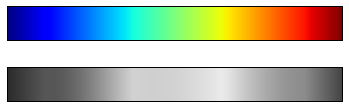

In [9]:
view_colormap('jet')

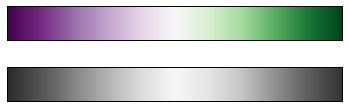

In [10]:
view_colormap('PRGn')

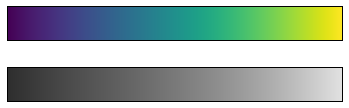

In [11]:
view_colormap('viridis') # в сером исполнении видно, что у 'viridis' яркость нарастает равномерно

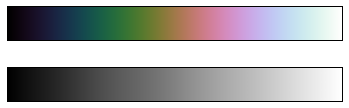

In [12]:
view_colormap('cubehelix')

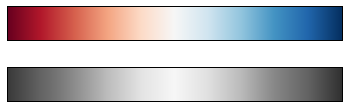

In [13]:
view_colormap('RdBu')

### Ограничения и расширенные возможности по использованию цветов

In [14]:
# создаем шум 1% от пикселов изображения

In [15]:
I.shape

(1000, 1000)

In [16]:
np.random.seed(20)
np.random.random(I.shape) < 0.01

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [17]:
speckles = (np.random.random(I.shape) < 0.01)

In [18]:
speckles

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [19]:
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

In [20]:
np.count_nonzero(speckles)

10035

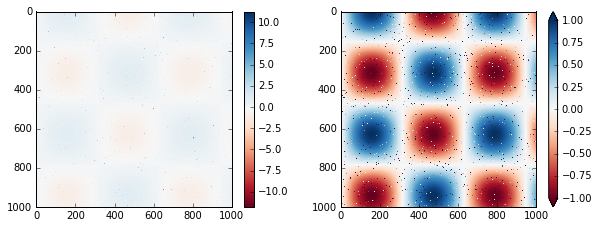

In [21]:
plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

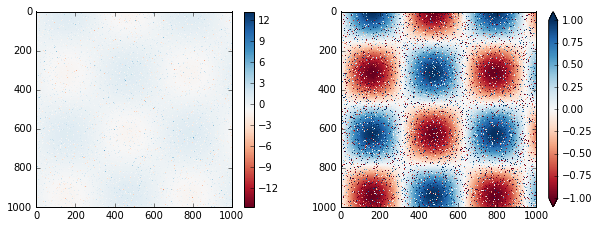

In [22]:
# 5%
speckles = (np.random.random(I.shape) < 0.05)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

### Дискретные шкалы цветов

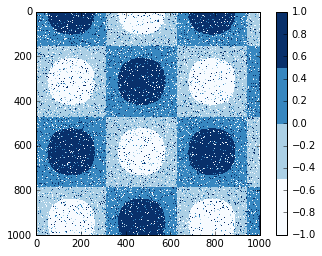

In [27]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 4)) # get_cmap делает цвета дискретными
plt.colorbar()
plt.clim(-1, 1)

### Пример: рукописные цифры

In [28]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

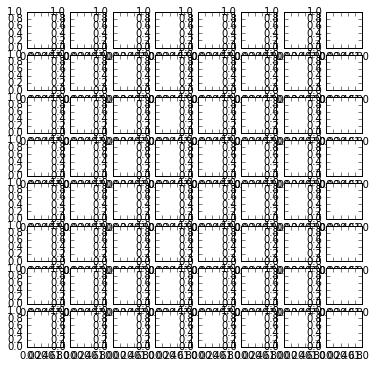

In [30]:
fig, ax = plt.subplots(8, 8, figsize=(6, 6))

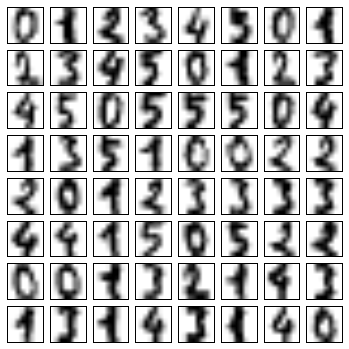

In [33]:
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [34]:
# отобразим цифры на двумерное просранство с помощью функции IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

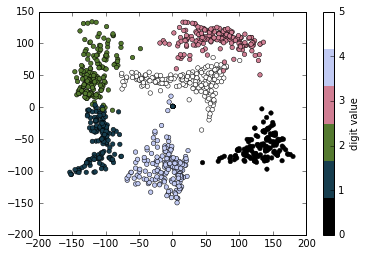

In [89]:
plt.scatter(projection[:, 0], projection[:, 1], lw=0.5,
           c=list(digits.target), cmap=plt.cm.get_cmap('cubehelix', 6))

plt.colorbar(ticks=range(6), label='digit value')

#plt.clim(-0.5, 0.5)